In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('acid.csv')
df.replace("Good", 1.0, inplace = True)
df.replace("Bad", 0.0, inplace = True)

In [3]:
X = df.drop(columns=['Y = Classification'])

In [4]:
Y = df['Y = Classification']

In [5]:
from scipy.stats import mode
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
def predict(x_train, y , x_input, k):
    op_labels = []
    for item in x_input: 
        point_dist = []
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train.iloc[j,:]) , item) 
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
        dist = np.argsort(point_dist)[:k] 
        labels = y[dist]
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [6]:
predict(X, Y,[(3,7)], 4)

[0.0]

In [7]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X.values,Y.values)
neigh.predict(np.array([3,7]).reshape(1,-1))

array([0.])

In [8]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X.values,Y.values)
neigh.predict(np.array([3,7]).reshape(1,-1))

array([0.])

In [9]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X.values,Y.values)
neigh.predict(np.array([3,7]).reshape(1,-1))

array([0.])

In [10]:
pltB = np.array(df.loc[df['Y = Classification'] == 0].drop(columns=['Y = Classification']))
pltG =  np.array(df.loc[df['Y = Classification'] == 1].drop(columns=['Y = Classification']))

In [11]:
import matplotlib.pyplot as plt

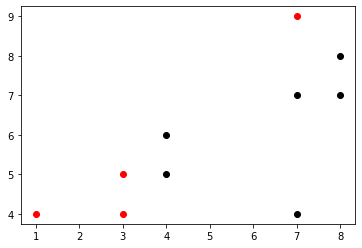

In [12]:
plt.scatter(pltB[:,0], pltB[:,1], color='k')
plt.scatter(pltG[:,0], pltG[:,1], color='r')

0 3 9 10
<class 'numpy.ndarray'>
0 3 9 10
<class 'numpy.ndarray'>


/home/student/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/student/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


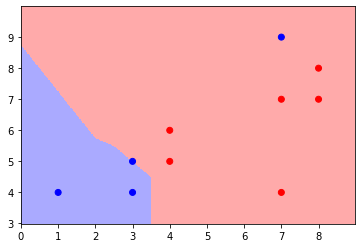

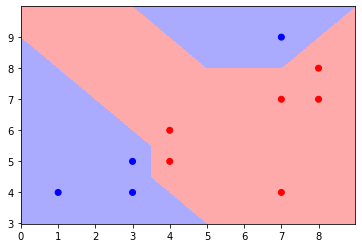

In [13]:

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 2

h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, Y)
    x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    print(x_min, y_min, x_max, y_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print(type(xx.astype(float)))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z.reshape(xx.shape))
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=Y, cmap=cmap_bold)
plt.show()